In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import pickle
import numpy as np
from scipy import sparse
from functools import partial
from sklearn.externals import joblib
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import seaborn as sns
import pandas as pd
from midi_ml.models.linear_decision_rules import LinearDiscriminantAnalysis

In [4]:
labels = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_labels.pkl")
features = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_matrix.pkl")
features = features.todense()
mozart_labels = [k for k in range(len(labels)) if labels[k] == "mozart"]
bach_labels = [k for k in range(len(labels)) if labels[k] == "bach-js"]
schubert_labels = [k for k in range(len(labels)) if labels[k] == "schubert"]
chopin_labels = [k for k in range(len(labels)) if labels[k] == "chopin"]
tchaikovsky_labels = [k for k in range(len(labels)) if labels[k] == "tchaikovsky"]
X = features[mozart_labels + bach_labels + schubert_labels + chopin_labels + tchaikovsky_labels].A
y = np.array([0 for i in range(len(mozart_labels))] + [1 for i in range(len(bach_labels))] + 
            [2 for i in range(len(schubert_labels))] + [3 for i in range(len(chopin_labels))] +
            [4 for i in range(len(tchaikovsky_labels))])
y = y.reshape((y.shape[0],))
del features

In [5]:
X = X[:,X.sum(axis=0).nonzero()[0]]

In [7]:
# mkdir dumps/lda

In [14]:
regularization_parameter = 0.01
predicted = []
actuals = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=10, shuffle=True):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    lda = LinearDiscriminantAnalysis(X_train, y_train, regularization=regularization_parameter, keep_copy_of_X=False)
    lda.fit()
    preds = lda.predict(X_test)
    predicted.append(preds)
    actuals.append(y_test)
    del lda
    pickle.dump(predicted, open("./dumps/lda/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/lda/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

In [8]:
from sklearn import metrics

In [9]:
metrics.accuracy_score(y_test, lda.predict(X_test))

0.74603174603174605

In [25]:
regularization_parameter=0.01
model_folder = "/home/jovyan/persistent_data/midi-ml/notebooks/ProjectTwoResults/dumps/lda/"
accuracy = []
precision = []
recall = []
f1 = []
mcc = []
predicted = pickle.load(open(model_folder + "predicted_fold_9_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
actuals = pickle.load(open(model_folder + "actuals_fold_9_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
for preds, actual in zip(predicted, actuals):
    pred = preds
    print("confusion matrix")
    print(metrics.confusion_matrix(actual, pred))
    print("\taccuracy")
    acc = metrics.accuracy_score(actual, pred)
    accuracy.append(acc)
    print("\t\t", acc)
    print("\tf1")
    f = metrics.f1_score(actual, pred)
    f1.append(f)
    print("\t\t", f)
    print("\trecall")
    r = metrics.recall_score(actual, pred)
    recall.append(r)
    print("\t\t", r)
    print("\tprecision")
    p = metrics.precision_score(actual, pred)
    precision.append(p)
    print("\t\t", p)

confusion matrix
[[ 31  31   5   8   1]
 [  3 223   0   8   4]
 [  0   1   7   4   9]
 [  1   7   4   9   3]
 [  0   2   3   7   7]]
	accuracy
		 0.732804232804
	f1
		 0.726552106257
	recall
		 0.732804232804
	precision
		 0.760927707074
confusion matrix
[[ 30  33  10   2   1]
 [  3 207   0   4   1]
 [  2   0  15   5  12]
 [  1  11   0   9   2]
 [  0   5   8  12   5]]
	accuracy
		 0.703703703704
	f1
		 0.683409216136
	recall
		 0.703703703704
	precision
		 0.704357518997
confusion matrix
[[ 26  29   8   2   1]
 [  4 238   0   3   0]
 [  2   0  14   3   7]
 [  1   6   1  15   1]
 [  0   3   8   3   3]]
	accuracy
		 0.783068783069
	f1
		 0.765065104401
	recall
		 0.783068783069
	precision
		 0.77541324146
confusion matrix
[[ 28  33  10   1   1]
 [  7 215   0   4   0]
 [  1   0  12   7   3]
 [  0  11   0  10   1]
 [  1   8   6  13   6]]
	accuracy
		 0.716931216931
	f1
		 0.692838111492
	recall
		 0.716931216931
	precision
		 0.719356014969
confusion matrix
[[ 41  24   5   2   3]
 [  3 211

/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample

In [28]:
np.max(accuracy)

0.79840848806366049

In [19]:
import seaborn as sns
from scipy.stats.distributions import beta
def posterior_overlap_eval(actual, pred, labels, granularity=10000):
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    tp_fn = []
    confusion = metrics.confusion_matrix(actual, pred)
    for i in range(confusion.shape[0]):
        tp = confusion[i,i]
        fn = np.delete(confusion[i,:], i).sum()
        tp_fn.append((tp, fn))
    betas = [beta(a=1 + tp, b = 1 + fn) for tp, fn in tp_fn]
    for i, beta_dist in enumerate(betas):
        random_draws = beta_dist.rvs(granularity)
        plt.hist(random_draws, alpha=0.2, color=colors[i], bins=np.linspace(0,1, 100))
        plt.vlines(random_draws.mean(), 0, 5000, label=labels[i], color=colors[i], linestyles="dotted")
    plt.legend(loc="upper left")
    plt.show()
labs = ["mozart", "bach", "schubert", "chopin", "tchaikovsky"]

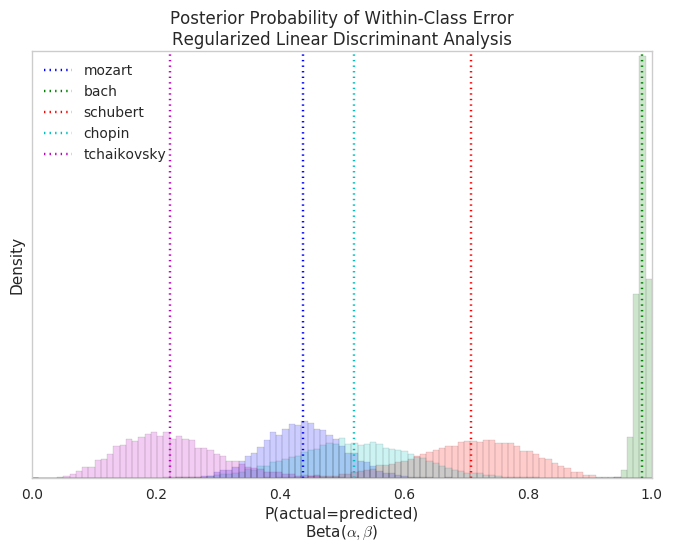

In [20]:
mymodel = "Regularized Linear Discriminant Analysis"
sns.set_style("whitegrid")
plt.title("Posterior Probability of Within-Class Error\n{model}".format(model=mymodel))
plt.xlabel('P(actual=predicted)\n' + r'Beta($\alpha, \beta$)')
plt.ylabel("Density")
plt.yticks([])
ax = plt.gca()
ax.grid(False)
posterior_overlap_eval(actual, pred, labels=labs)

In [23]:
regularization_parameter = 0.001
predicted = []
actuals = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=10, shuffle=True):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    lda = LinearDiscriminantAnalysis(X_train, y_train, regularization=regularization_parameter, keep_copy_of_X=False)
    lda.fit()
    preds = lda.predict(X_test)
    predicted.append(preds)
    actuals.append(y_test)
    del lda
    pickle.dump(predicted, open("./dumps/lda/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/lda/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

In [24]:
regularization_parameter=0.001
model_folder = "/home/jovyan/persistent_data/midi-ml/notebooks/ProjectTwoResults/dumps/lda/"
accuracy = []
precision = []
recall = []
f1 = []
mcc = []
predicted = pickle.load(open(model_folder + "predicted_fold_7_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
actuals = pickle.load(open(model_folder + "actuals_fold_7_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
for preds, actual in zip(predicted, actuals):
    pred = preds
    print("confusion matrix")
    print(metrics.confusion_matrix(actual, pred))
    print("\taccuracy")
    acc = metrics.accuracy_score(actual, pred)
    accuracy.append(acc)
    print("\t\t", acc)
    print("\tf1")
    f = metrics.f1_score(actual, pred)
    f1.append(f)
    print("\t\t", f)
    print("\trecall")
    r = metrics.recall_score(actual, pred)
    recall.append(r)
    print("\t\t", r)
    print("\tprecision")
    p = metrics.precision_score(actual, pred)
    precision.append(p)
    print("\t\t", p)

confusion matrix
[[ 27  31   8   3   6]
 [  2 233   1   3   1]
 [  1   0  10   6   6]
 [  0   7   1  10   1]
 [  1   2   8   8   2]]
	accuracy
		 0.746031746032
	f1
		 0.728212230768
	recall
		 0.746031746032
	precision
		 0.760133239492
confusion matrix
[[ 26  30  12   2   0]
 [  4 217   0   7   1]
 [  1   1   9   4   8]
 [  2  17   2  11   3]
 [  1   1   5   8   6]]
	accuracy
		 0.71164021164
	f1
		 0.692728891041
	recall
		 0.71164021164
	precision
		 0.705738911062
confusion matrix
[[ 29  39  10   2   0]
 [  4 216   2   5   0]
 [  0   2   8   7   7]
 [  0   8   0   7   3]
 [  0   7   6  10   6]]
	accuracy
		 0.703703703704
	f1
		 0.682907882177
	recall
		 0.703703703704
	precision
		 0.721936157934
confusion matrix
[[ 26  38   8   5   3]
 [  3 209   0   6   1]
 [  2   1  10   7   9]
 [  0   8   1  12   2]
 [  0   7   5  14   1]]
	accuracy
		 0.68253968254
	f1
		 0.655652527654
	recall
		 0.68253968254
	precision
		 0.690937977069
confusion matrix
[[ 26  23   8   3   0]
 [  2 240   

/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample